In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
nifty_50_df = pd.read_csv(r"C:\Users\rachi\Downloads\INDIAVIX (1).csv", index_col='Date', parse_dates=['Date'])
nifty_50_df.head(5)


,Open,High,Low,Close,Previous,Change,%Change
Date,,,,,,,
2009-03-02,43.19,43.38,41.44,43.17,NaN,0.00,0.0000
2009-03-03,43.17,43.90,41.20,43.89,43.17,0.72,0.0167
2009-03-04,43.89,43.89,42.16,42.52,43.89,-1.37,-0.0312
2009-03-05,42.52,42.71,40.41,41.49,42.52,-1.03,-0.0242
2009-03-06,41.49,41.49,37.57,38.16,41.49,-3.33,-0.0803


In [3]:
nifty_50_df.tail(5)

,Open,High,Low,Close,Previous,Change,%Change
Date,,,,,,,
2020-05-04,33.9875,43.920,33.9875,43.6700,33.9875,9.68,0.2849
2020-05-05,43.6700,43.865,38.1475,43.6075,43.6700,-0.06,-0.0014
2020-05-06,43.6075,43.630,40.1975,41.2475,43.6075,-2.36,-0.0541
2020-05-07,41.2475,41.715,39.6575,39.9300,41.2475,-1.32,-0.0319
2020-05-08,39.9300,39.930,36.5475,38.4075,39.9300,-1.52,-0.0381


In [4]:
nifty_50_df = nifty_50_df.fillna(method='ffill')


In [5]:
def plot_attribute(df, attritube ,start='2012', end='2020',color ='green'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Nifty stock {} from 2012 to 2020".format(attritube))
    
    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')
    
    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAX',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
            fontsize=20)
    
    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MIN',
            horizontalalignment='left',
            verticalalignment='top',
            color='red',
            fontsize=20)
    
    plt.show()
    print("Max Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Value :  ",df[start:end].describe()[attritube]["min"])


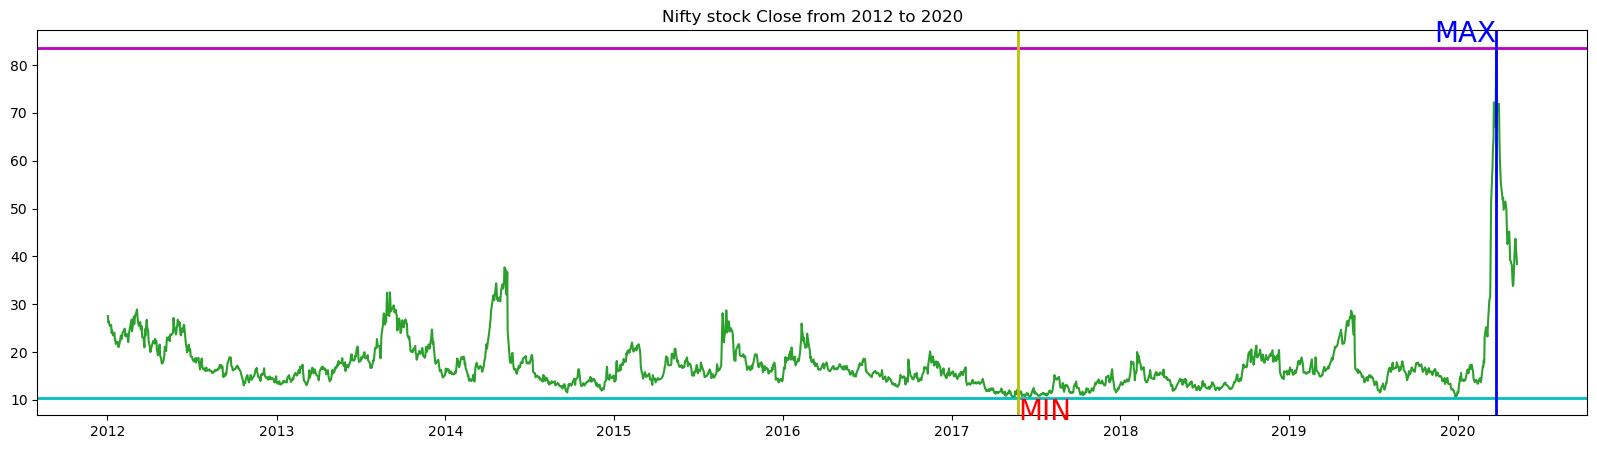

Max Value :   83.6075
Min Value :   10.4475


In [6]:
plot_attribute(nifty_50_df,"Close",color='green')

In [7]:
Candlestick_data = nifty_50_df['3-2020':'2020']

fig = go.Figure(data=go.Candlestick(x=Candlestick_data.index,
                            open=Candlestick_data['Open'],
                            high=Candlestick_data['High'],
                            low=Candlestick_data['Low'],
                            close=Candlestick_data['Close']))

fig.update_layout(title_text='Nifty 50 From March 2020 to May 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, 
                  xaxis_title="Time", 
                  yaxis_title="Price")

fig.show()


In [8]:
train_data = nifty_50_df["Close"]["2018":"4-15-2020"]
test_data =  nifty_50_df["Close"]["4-15-2020":]

In [9]:
model = SARIMAX(train_data, order=(5,1,2)) 
results = model.fit()

C:\Users\rachi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\rachi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\rachi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [10]:
mae = np.mean(np.abs(results.resid))
print(mae)

0.8069989563334335


In [11]:
prediction = results.get_prediction(start="7-2019")

In [12]:
predictedmean = prediction.predicted_mean
p_bounds = prediction.conf_int()
p_lower_limit = p_bounds.iloc[:,0]
p_upper_limit = p_bounds.iloc[:,1]

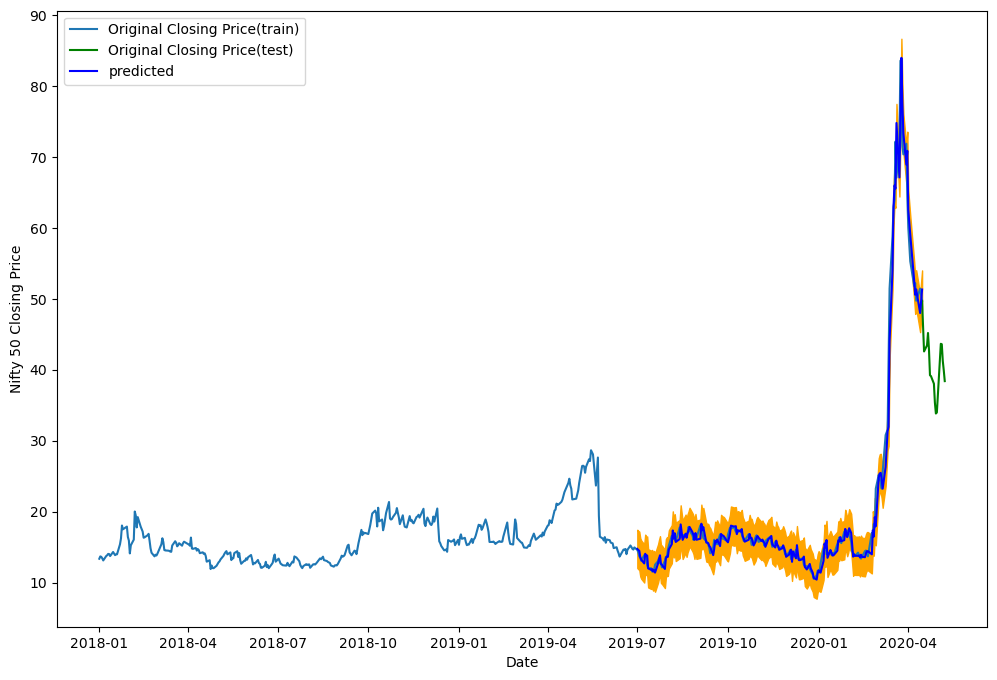

In [13]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='Original Closing Price(train)')
plt.plot(test_data.index, test_data, label='Original Closing Price(test)',color='g')

plt.plot(predictedmean.index, predictedmean, color='b', label='predicted')


plt.fill_between(predictedmean.index,p_lower_limit,p_upper_limit, color='orange')


plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()


In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/package

   ----------------------- ---------------- 216.8/377.0 MB 1.5 MB/s eta 0:01:49
   ----------------------- ---------------- 216.9/377.0 MB 1.5 MB/s eta 0:01:49
   ----------------------- ---------------- 217.0/377.0 MB 1.5 MB/s eta 0:01:49
   ----------------------- ---------------- 217.0/377.0 MB 1.5 MB/s eta 0:01:49
   ----------------------- ---------------- 217.1/377.0 MB 1.5 MB/s eta 0:01:50
   ----------------------- ---------------- 217.1/377.0 MB 1.5 MB/s eta 0:01:50
   ----------------------- ---------------- 217.2/377.0 MB 1.5 MB/s eta 0:01:51
   ----------------------- ---------------- 217.3/377.0 MB 1.5 MB/s eta 0:01:50
   ----------------------- ---------------- 217.3/377.0 MB 1.4 MB/s eta 0:01:51
   ----------------------- ---------------- 217.4/377.0 MB 1.4 MB/s eta 0:01:51
   ----------------------- ---------------- 217.4/377.0 MB 1.4 MB/s eta 0:01:52
   ----------------------- ---------------- 217.5/377.0 MB 1.4 MB/s eta 0:01:52
   ----------------------- -------------

In [3]:
import keras
import keras.backend as K
K.clear_session()
from sklearn.preprocessing import MinMaxScaler


In [1]:
X = nifty_50_df.drop(["Close","Turnover","P/E","P/B","Div Yield"],axis=1)
y = nifty_50_df["Close"]

# Preprocessing
scaler = MinMaxScaler()
scaler_X = scaler.fit_transform(X)

X_df = pd.DataFrame(data=scaler_X, columns=["Open","High","Low","Volume"],index= X.index)
y_df = pd.DataFrame(data=y, columns=["Close"],index= y.index)

train_X_df = X_df["2012":"1-2-2020"]
test_X_df = X_df["1-2-2020":]

train_y_df = y_df["2012":"1-2-2020"]
test_y_df = y_df["1-2-2020":]

train_X = np.array(train_X_df)
test_X = np.array(test_X_df)

train_y = np.array(train_y_df)
test_y = np.array(test_y_df)

train_X = np.reshape(train_X,(train_X.shape[0],train_X.shape[1],1))
test_X = np.reshape(test_X,(test_X.shape[0],test_X.shape[1],1))

train_y = np.reshape(train_y,(train_y.shape[0],1))
test_y = np.reshape(test_y,(test_y.shape[0],1))


NameError: name 'nifty_50_df' is not defined

In [8]:
print("Train X shape : ", train_X.shape)
print("Test X shape : ", test_X.shape)

print("Train y shape : ", train_y.shape)
print("Test y shape : ", test_y.shape)

NameError: name 'train_X' is not defined